<a href="https://colab.research.google.com/github/r-matsuzaka/aws-saa-solve-problem/blob/main/notebook/aws_saa_problem_choice_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib
import random
import matplotlib.pyplot as plt
import pandas as pd


random.seed(42)

n_batch = 2
n_section = 3#number of problem
n_skip = 0#skip batch2
title = "test-attempt"

In [2]:
from google.colab import drive

google_drive_path = '/content/drive'
drive.mount(google_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sections = list(range(1,7))
problems = list(range(1,66))
all = []

for v1 in sections:
    for v2 in problems:
        all.append(str(v1) + "-" + str(v2))

In [4]:
def answer_problem(n, skip):
  """
  Args:
    n(int): number of question
    skip(bool)
  """
  correct_cnt = 0

  for i in range(1, n+1):
    chosen_problem = random.sample(all,1)[0]
    print(f"Question{i} is {chosen_problem}")

    if skip:
      print("skipped")
    
    else:
      your_ans = int(input())
      ans = int(input())
      output_res(chosen_problem, your_ans, ans)
      if your_ans == ans:
        #print("correct")
        correct_cnt += 1
      #else: 
        #print("wrong")
  
  correct_percent = int(100 * correct_cnt / n)

  print(correct_percent)

  return correct_percent

In [5]:
def output_res(chosen_problem, your_ans, ans):
  dir_path = f'{google_drive_path}/MyDrive/aws_saa_practice/res'
  res_path = pathlib.Path(dir_path)
  csv_path = pathlib.Path(f'{dir_path}/{title}.csv')

  if not res_path.exists():
    res_path.mkdir(parents=True)

  if csv_path.exists():
    res_df = pd.read_csv(csv_path, index_col=0)
    
  else:
    res_df = pd.DataFrame(columns=["your_ans", "ans"])

  res_df.loc[chosen_problem] = [your_ans, ans]
  res_df.to_csv(csv_path, index = True)

In [6]:
def plot_score(correct_percents:list):
  n = len(correct_percents)
  plt.bar(list(range(1, n+1)),correct_percents)


In [7]:
def average(lst):
  ave = sum(lst) / len(lst)
  print(f"average score is {ave}")

Batch 1
Question1 is 6-3
1
1
Question2 is 1-58
2
2
Question3 is 1-13
3
3
100
Batch 2
Question1 is 6-55
4
4
Question2 is 3-11
5
5
Question3 is 2-61
6
6
100
average score is 100.0


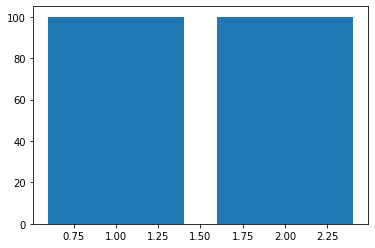

In [8]:
from numpy import e
correct_percents = []

for i in range(1, n_batch + 1):
  print(f"Batch {i}")

  if i <= n_skip:
    skip = True

  else:
    skip = False
    
  correct_percent = answer_problem(n_section, skip)
  correct_percents.append(correct_percent)

plot_score(correct_percents)

average(correct_percents)